In [20]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap


import matplotlib.pyplot as plt

## Load in CSV (Option 1)

In [21]:
# Loads in ./data/cohere_2ndbrain_embeddings.csv and ./data/cohere_memory_embeddings.csv

# in form: filename,index,chunk_text,embedding,links
brain_df = pd.read_csv('./sample_data/cohere_2ndbrain_embeddings.csv')
memory_df = pd.read_csv('./sample_data/cohere_memory_embeddings.csv')

memory_embeddings = memory_df['embedding'].apply(lambda x: eval(x))
brain_embeddings = brain_df['embedding'].apply(lambda x: eval(x))

memory_embeddings = np.array([np.array(x) for x in memory_embeddings])
brain_embeddings = np.array([np.array(x) for x in brain_embeddings])

In [22]:
# Stores filenames in simple csv format 
brain_df['filename'].to_csv('./sample_data/brain_filenames.csv', index=False)
memory_df['filename'].to_csv('./sample_data/memory_filenames.csv', index=False)

# Load in NPZ (Option 2)

In [23]:
# loads npz for embeddings
memory_embeddings_npz = np.load('./sample_data/cohere_memory_embeddings.npz')
brain_embeddings_npz = np.load('./sample_data/cohere_2ndbrain_embeddings.npz')
memory_embeddings = memory_embeddings_npz['embeddings']
brain_embeddings = brain_embeddings_npz['embeddings']

# loads csv for filenames
brain_filenames = pd.read_csv('./sample_data/brain_filenames.csv', header=None)
memory_filenames = pd.read_csv('./sample_data/memory_filenames.csv', header=None)

# PCA (5 and 3 dim)

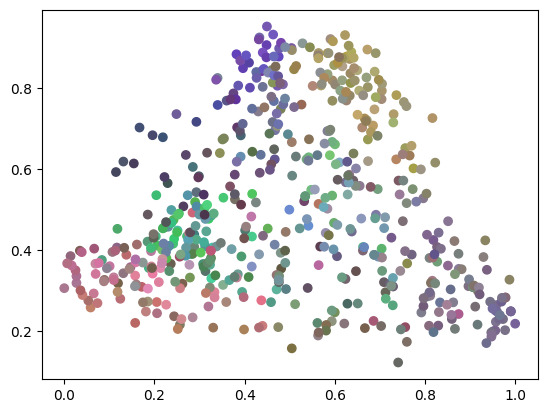

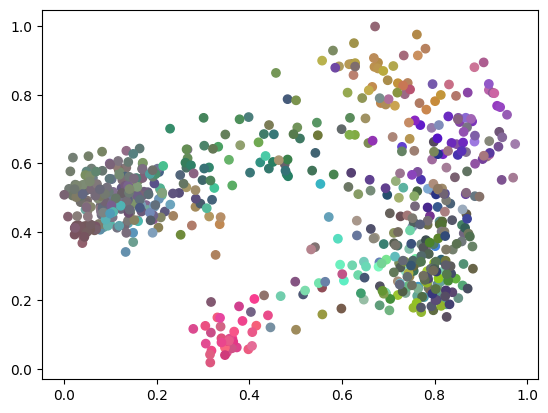

In [24]:
# Runs PCA on memory embeddings and plots them as x, y, r, g, b (4096 dim -> 5 dim), converts color to 0-1 for matplotlib

pca5 = PCA(n_components=5)
memory_embeddings_pca5 = pca5.fit_transform(memory_embeddings)

# Normalize values to 0-1 using min-max normalization
memory_embeddings_pca5 = (memory_embeddings_pca5 - memory_embeddings_pca5.min()) / (memory_embeddings_pca5.max() - memory_embeddings_pca5.min())

# Plot memory embeddings
plt.scatter(memory_embeddings_pca5[:, 0], memory_embeddings_pca5[:, 1], c=memory_embeddings_pca5[:, 2:5])
plt.show()

# now for brain embeddings
brain_embeddings_pca5 = pca5.fit_transform(brain_embeddings)
brain_embeddings_pca5 = (brain_embeddings_pca5 - brain_embeddings_pca5.min()) / (brain_embeddings_pca5.max() - brain_embeddings_pca5.min())

plt.scatter(brain_embeddings_pca5[:, 0], brain_embeddings_pca5[memory_embeddings_kmeans5 == 2. 1], c=brain_embeddings_pca5[memory_embeddings_kmeans5 == 2. 2:5])
plt.show()


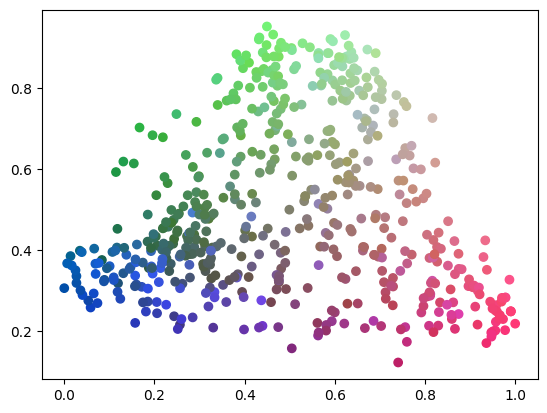

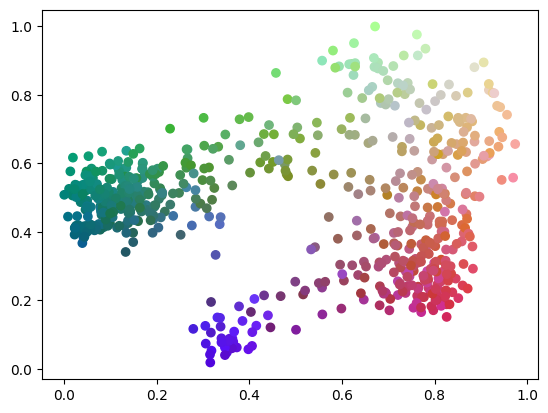

In [25]:
# Plot memory embeddings with UMAP x, y 
plt.scatter(memory_embeddings_pca5[:, 0], memory_embeddings_pca5[:, 1], c=memory_embeddings_pca5[:, 0:3])
plt.show()

# Plot brain embeddings with UMAP x, y
plt.scatter(brain_embeddings_pca5[:, 0], brain_embeddings_pca5[:, 1], c=brain_embeddings_pca5[:, 0:3])
plt.show()

# TSNE + PCA (5 then 3 dim) colors

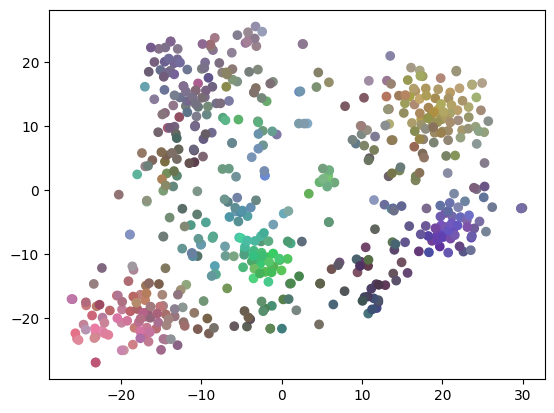

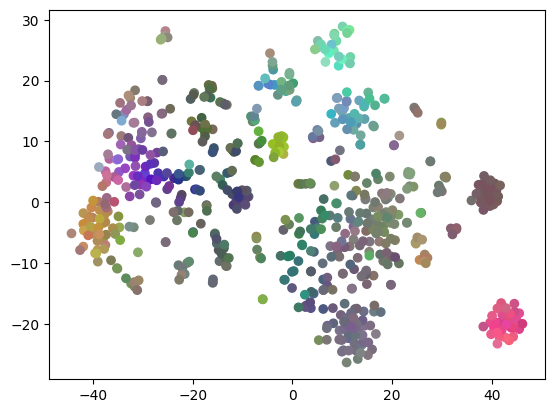

In [26]:
# Runs t-SNE on embeddings to get new XY, then uses PCA RGB already calculated
tsne2 = TSNE(n_components=2)
memory_embeddings_tsne2 = tsne2.fit_transform(memory_embeddings)

plt.scatter(memory_embeddings_tsne2[:, 0], memory_embeddings_tsne2[:, 1], c=memory_embeddings_pca5[:, 2:5])
plt.show()

brain_embeddings_tsne2 = tsne2.fit_transform(brain_embeddings)

plt.scatter(brain_embeddings_tsne2[:, 0], brain_embeddings_tsne2[:, 1], c=brain_embeddings_pca5[:, 2:5])
plt.show()

# UMAP + UMAP Colors 

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


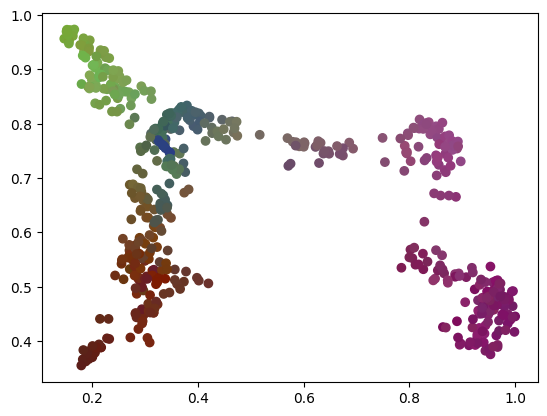

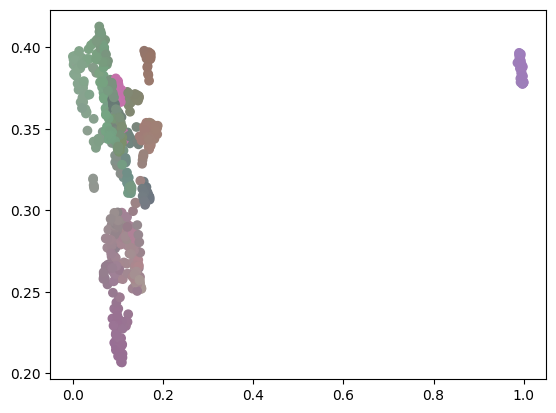

In [27]:

# UMAP with 5 components
umap_reducer5 = umap.UMAP(n_components=5)
memory_embeddings_umap5 = umap_reducer5.fit_transform(memory_embeddings)

# Normalize to 0-1 using min-max normalization
memory_embeddings_umap5 = (memory_embeddings_umap5 - memory_embeddings_umap5.min()) / (memory_embeddings_umap5.max() - memory_embeddings_umap5.min())

# Plot memory embeddings with UMAP
plt.scatter(memory_embeddings_umap5[:, 0], memory_embeddings_umap5[:, 1], c=memory_embeddings_umap5[:, 2:5])
plt.show()

brain_embeddings_umap5 = umap_reducer5.fit_transform(brain_embeddings)

# Normalize color values (2:5) to 0-1 using min-max normalization
brain_embeddings_umap5 = (brain_embeddings_umap5 - brain_embeddings_umap5.min()) / (brain_embeddings_umap5.max() - brain_embeddings_umap5.min())

# Plot brain embeddings with UMAP
plt.scatter(brain_embeddings_umap5[:, 0], brain_embeddings_umap5[:, 1], c=brain_embeddings_umap5[:, 2:5])
plt.show()


# UMAP + PCA5 Colors

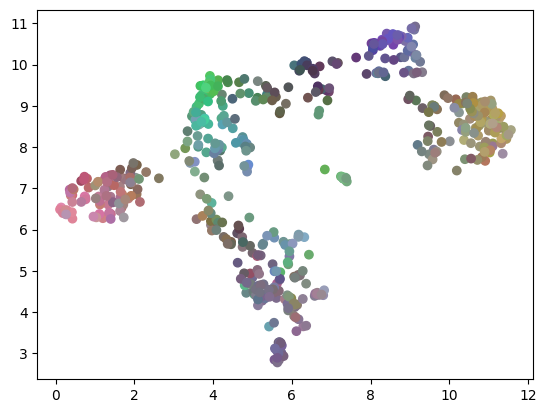

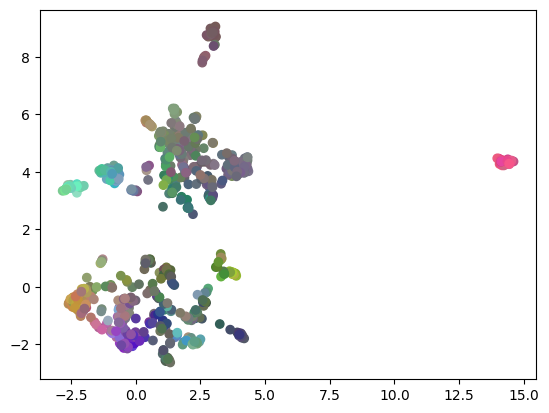

In [28]:
    # UMAP with 2 components
    umap_reducer2 = umap.UMAP(n_components=2)
    memory_embeddings_umap2 = umap_reducer2.fit_transform(memory_embeddings)

    # Plot memory embeddings with UMAP
    plt.scatter(memory_embeddings_umap2[:, 0], memory_embeddings_umap2[:, 1], c=memory_embeddings_pca5[:, 2:5])
    plt.show()

    brain_embeddings_umap2 = umap_reducer2.fit_transform(brain_embeddings)

    # Plot brain embeddings with UMAP
    plt.scatter(brain_embeddings_umap2[:, 0], brain_embeddings_umap2[:, 1], c=brain_embeddings_pca5[:, 2:5])
    plt.show()

# Clustering and Vis

In [12]:
%matplotlib qt

# if memory_embeddings_tsne2 is None:
memory_embeddings_tsne2 = memory_embeddings_npz['tsne2']

# Clusters embeddings using KMeans
from sklearn.cluster import KMeans

# KMeans with 5 clusters
kmeans5 = KMeans(n_clusters=5)
memory_embeddings_kmeans5 = kmeans5.fit_predict(memory_embeddings)

# Plot memory embeddings with KMeans
plt.scatter(memory_embeddings_tsne2[:, 0], memory_embeddings_tsne2[:, 1], c=memory_embeddings_kmeans5)
# Colorbar
plt.colorbar()

# Adds filenames in small text to each point, ensuring index doesnt go out of bounds
for i in range(len(memory_embeddings_tsne2)):
    plt.text(memory_embeddings_tsne2[i, 0], memory_embeddings_tsne2[i, 1], memory_filenames.iloc[i, 0][:-4], fontsize=8)

plt.show()


/Users/aidanbx/miniconda/envs/cv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


1   HIToolbox                           0x00000001bb2205c8 _ZN15MenuBarInstance22EnsureAutoShowObserverEv + 120
2   HIToolbox                           0x00000001bb18d8c8 _ZN15MenuBarInstance21UpdateAggregateUIModeE21MenuBarAnimationStylehhh + 1196
3   HIToolbox                           0x00000001bb220004 _ZN15MenuBarInstance19SetFullScreenUIModeEjj + 180
4   AppKit                              0x00000001b5016008 -[NSApplication _setPresentationOptions:instance:flags:] + 956
5   AppKit                              0x00000001b4eabbb0 -[NSApplication _updateFullScreenPresentationOptionsForInstance:] + 404
6   CoreFoundation                      0x00000001b1acd570 __CFNOTIFICATIONCENTER_IS_CALLING_OUT_TO_AN_OBSERVER__ + 148
7   CoreFoundation                      0x00000001b1b6b054 ___CFXRegistrationPost_block_invoke + 88
8   CoreFoundation                      0x00000001b1b6af9c _CFXRegistrationPost + 440
9   CoreFoundation                      0x00000001b1a9eb74 _CFXNotificationPost + 

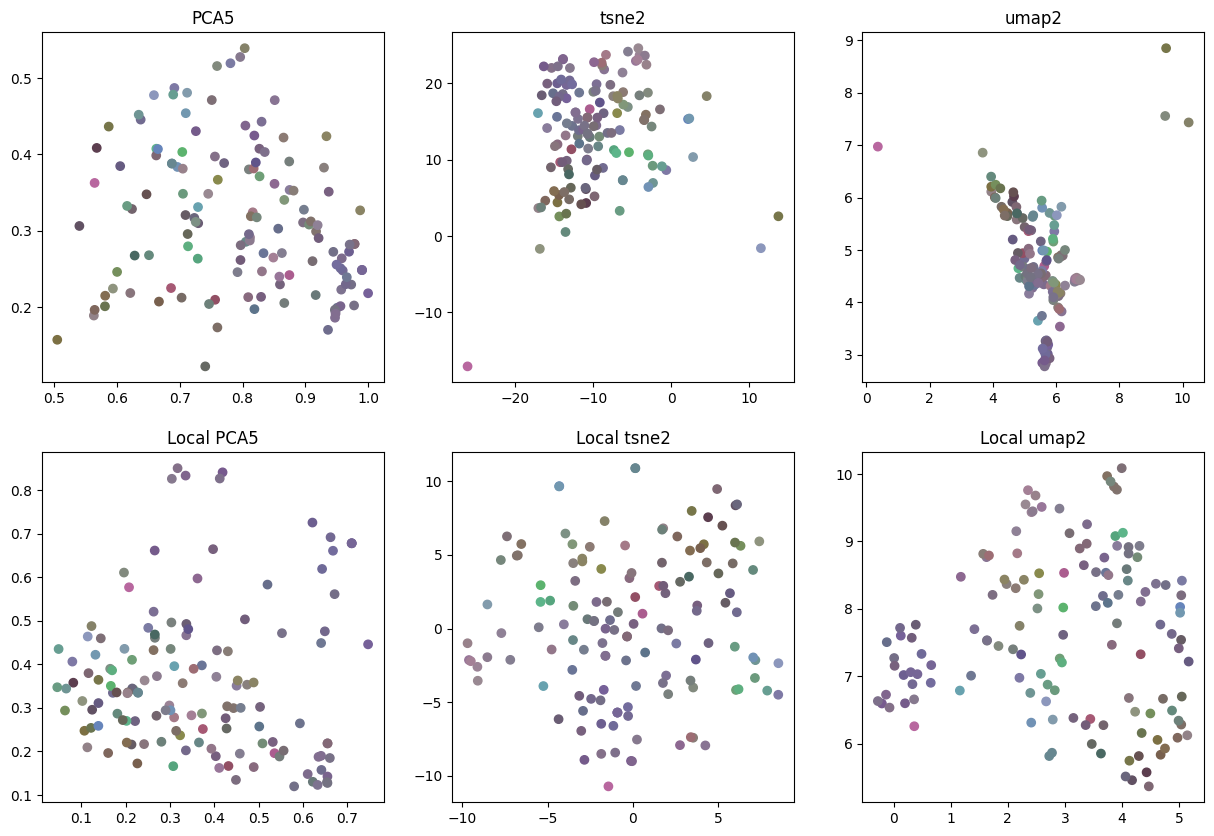

: 

In [36]:
%matplotlib inline

# Cluster 2 embeddings
memory_embeddings_cluster2 = memory_embeddings[memory_embeddings_kmeans5 == 2]

# Reduces dimensionality of cluster 2 embeddings to 2 using PCA5
memory_embeddings_cluster2_pca5 = pca5.fit_transform(memory_embeddings_cluster2)
# Normalize to 0-1 using min-max normalization
memory_embeddings_cluster2_pca5 = (memory_embeddings_cluster2_pca5 - memory_embeddings_cluster2_pca5.min()) / (memory_embeddings_cluster2_pca5.max() - memory_embeddings_cluster2_pca5.min())

# Reduces dimensionality of cluster 2 embeddings to 2 using tsne
memory_embeddings_cluster2_tsne2 = tsne2.fit_transform(memory_embeddings_cluster2)

# Reduces dimensionality of cluster 2 embeddings to 2 using umap
memory_embeddings_cluster2_umap2 = umap_reducer2.fit_transform(memory_embeddings_cluster2)

# Create plot of 3 on top and 3 on bottom, with the top ones being the original reductions of cluster 2 and the bottom being reductions of just cluster2 (the ones done above)
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Plot PCA5
axs[0, 0].scatter(memory_embeddings_pca5[memory_embeddings_kmeans5 == 2, 0], memory_embeddings_pca5[memory_embeddings_kmeans5 == 2, 1], c=memory_embeddings_pca5[memory_embeddings_kmeans5 == 2, 2:5])
axs[0, 0].set_title('PCA5')

# Plot tsne2
axs[0, 1].scatter(memory_embeddings_tsne2[memory_embeddings_kmeans5 == 2, 0], memory_embeddings_tsne2[memory_embeddings_kmeans5 == 2, 1], c=memory_embeddings_pca5[memory_embeddings_kmeans5 == 2, 2:5])
axs[0, 1].set_title('tsne2')

# Plot umap2
axs[0, 2].scatter(memory_embeddings_umap2[memory_embeddings_kmeans5 == 2, 0], memory_embeddings_umap2[memory_embeddings_kmeans5 == 2, 1], c=memory_embeddings_pca5[memory_embeddings_kmeans5 == 2, 2:5])
axs[0, 2].set_title('umap2')

# Plot local PCA5
axs[1, 0].scatter(memory_embeddings_cluster2_pca5[:, 0], memory_embeddings_cluster2_pca5[:, 1], c=memory_embeddings_pca5[memory_embeddings_kmeans5 == 2, 2:5])
axs[1, 0].set_title('Local PCA5')

# Plot local tsne2
axs[1, 1].scatter(memory_embeddings_cluster2_tsne2[:, 0], memory_embeddings_cluster2_tsne2[:, 1], c=memory_embeddings_pca5[memory_embeddings_kmeans5 == 2, 2:5])
axs[1, 1].set_title('Local tsne2')

# Plot local umap2
axs[1, 2].scatter(memory_embeddings_cluster2_umap2[:, 0], memory_embeddings_cluster2_umap2[:, 1], c=memory_embeddings_pca5[memory_embeddings_kmeans5 == 2, 2:5])
axs[1, 2].set_title('Local umap2')

plt.show()

# Store in NPZ and CSV

In [ ]:
# Adds all the reduced embeddings to memory_df and brain_df and saves them back to ./sample_data
# Each column is a different dimensionality reduction technique (pca5, pca3, tsne2, umap5, umap2), each entry is an array
memory_df['pca5'] = memory_embeddings_pca5.tolist()
memory_df['tsne2'] = memory_embeddings_tsne2.tolist()
memory_df['umap5'] = memory_embeddings_umap5.tolist()
memory_df['umap2'] = memory_embeddings_umap2.tolist()

brain_df['pca5'] = brain_embeddings_pca5.tolist()
brain_df['tsne2'] = brain_embeddings_tsne2.tolist()
brain_df['umap5'] = brain_embeddings_umap5.tolist()
brain_df['umap2'] = brain_embeddings_umap2.tolist()

memory_df.to_csv('./sample_data/cohere_memory_embeddings.csv')
brain_df.to_csv('./sample_data/cohere_2ndbrain_embeddings.csv')

In [ ]:
embeddings_df = pd.read_csv('./sample_data/cohere_memory_embeddings.csv')

embeddings = embeddings_df['embedding'].apply(lambda x: eval(x))
embeddings = np.array([np.array(x) for x in embeddings])

pca5 = embeddings_df['pca5'].apply(lambda x: eval(x))
pca5 = np.array([np.array(x) for x in pca5])

umap2 = embeddings_df['umap2'].apply(lambda x: eval(x))
umap2 = np.array([np.array(x) for x in umap2])

umap5 = embeddings_df['umap5'].apply(lambda x: eval(x))
umap5 = np.array([np.array(x) for x in umap5])

tsne2 = embeddings_df['tsne2'].apply(lambda x: eval(x))
tsne2 = np.array([np.array(x) for x in tsne2])

# stores as npz file
np.savez('./sample_data/cohere_memory_embeddings.npz', embeddings=embeddings, pca5=pca5, umap2=umap2, umap5=umap5, tsne2=tsne2)